In [4]:
import pandas as pd
import numpy as np

# Load your logs
df = pd.read_csv("classified_logs4.csv")

# Split into 20 batches
batches = np.array_split(df, 20)

# Access batches like:
for i, batch in enumerate(batches):
    print(f"Processing batch {i+1} with {len(batch)} logs")
    # process batch here


Processing batch 1 with 1300 logs
Processing batch 2 with 1300 logs
Processing batch 3 with 1300 logs
Processing batch 4 with 1300 logs
Processing batch 5 with 1300 logs
Processing batch 6 with 1300 logs
Processing batch 7 with 1300 logs
Processing batch 8 with 1300 logs
Processing batch 9 with 1300 logs
Processing batch 10 with 1300 logs
Processing batch 11 with 1300 logs
Processing batch 12 with 1300 logs
Processing batch 13 with 1300 logs
Processing batch 14 with 1300 logs
Processing batch 15 with 1300 logs
Processing batch 16 with 1300 logs
Processing batch 17 with 1300 logs
Processing batch 18 with 1300 logs
Processing batch 19 with 1300 logs
Processing batch 20 with 1300 logs


C:\Users\aviro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [5]:
for i, batch in enumerate(batches):
    batch.to_csv(f"batch_{i+1}.csv", index=False)


In [1]:
def get_ip_scores(df_batch):
    total_logs = len(df_batch)
    total_anomalous = df_batch[df_batch['Anomaly Detected'] == 'Yes']
    
    # Count how often each IP was marked anomalous
    ip_anomaly_counts = total_anomalous['IP Address'].value_counts()

    ip_scores = {}

    for ip, count in ip_anomaly_counts.items():
        # Option 1: Based on total logs
        score = count / total_logs

        # Option 2 (alternate): Based on total anomalous logs
        # score = count / len(total_anomalous)

        ip_scores[ip] = score

    return ip_scores


In [2]:
class AnomalyMemorySimple:
    def __init__(self, threshold=0.01, ttl=2):
        self.memory = {}  # ip -> (score, ttl)
        self.threshold = threshold
        self.ttl = ttl

    def update(self, ip_scores):
        for ip, score in ip_scores.items():
            if score >= self.threshold:
                self.memory[ip] = (score, self.ttl)

    def decay(self):
        to_remove = []
        for ip in self.memory:
            score, ttl = self.memory[ip]
            if ttl <= 1:
                to_remove.append(ip)
            else:
                self.memory[ip] = (score, ttl - 1)
        for ip in to_remove:
            del self.memory[ip]

    def get_suspicious_ips(self):
        return list(self.memory.keys())


In [15]:
# df_batch = your current 1000-log DataFrame
df_batch = pd.read_csv("batches/batch_1.csv")
ip_scores = get_ip_scores(df_batch)

memory = AnomalyMemorySimple(threshold=0.01, ttl=2)

memory.update(ip_scores)
memory.decay()

suspicious_ips = memory.get_suspicious_ips()
print("Suspicious IPs in this batch:", suspicious_ips)

Suspicious IPs in this batch: ['150.183.249.110', '60.30.224.116']


In [16]:
import matplotlib.pyplot as plt

def plot_ip_scores(ip_scores, memory):
    # Sort IPs by score (optional for better visualization)
    sorted_ips = sorted(ip_scores.items(), key=lambda x: x[1], reverse=True)
    ips, scores = zip(*sorted_ips)

    # Get list of suspicious IPs from memory
    suspicious = set(memory.get_suspicious_ips())

    # Set bar colors: red for suspicious, blue otherwise
    colors = ['red' if ip in suspicious else 'blue' for ip in ips]

    # Plot
    plt.figure(figsize=(15, 6))
    plt.bar(ips, scores, color=colors)
    plt.xlabel("IP Address")
    plt.ylabel("Anomaly Score (Probability)")
    plt.title("IP Anomaly Scores - Suspicious IPs Highlighted")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


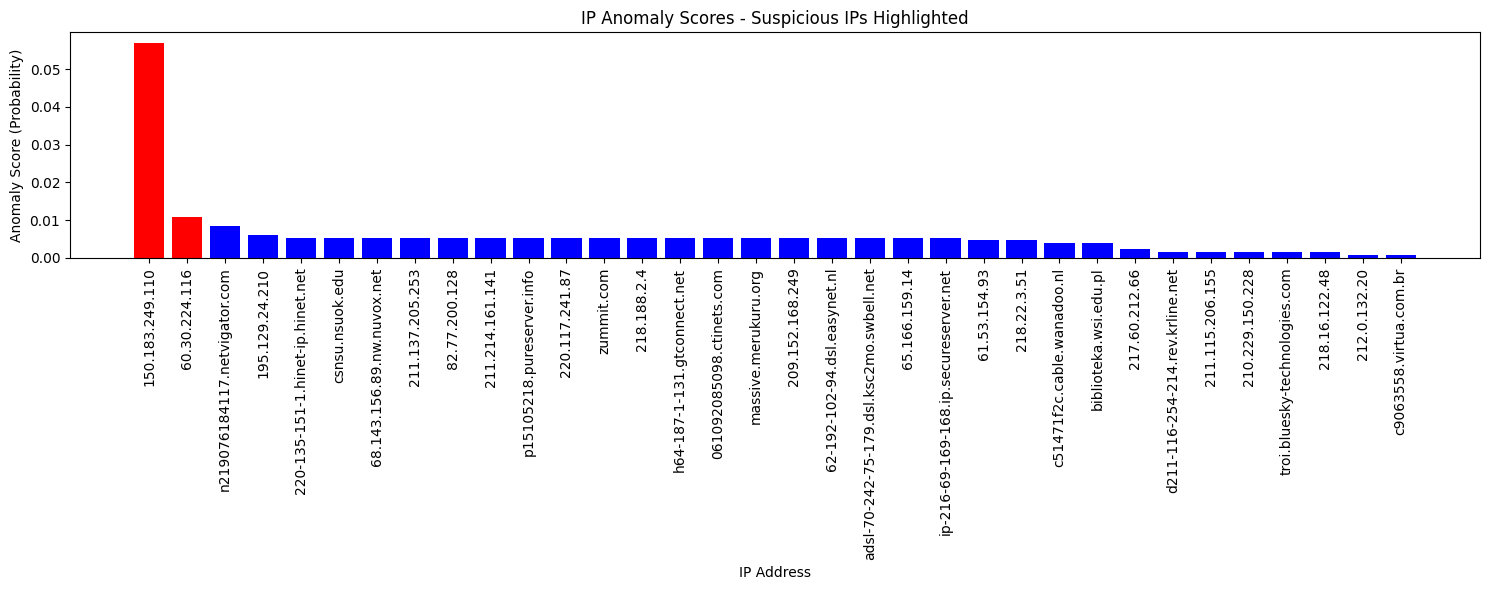

In [17]:
plot_ip_scores(ip_scores, memory)

All 20 batches in one go 


📦 Processing Batch 1


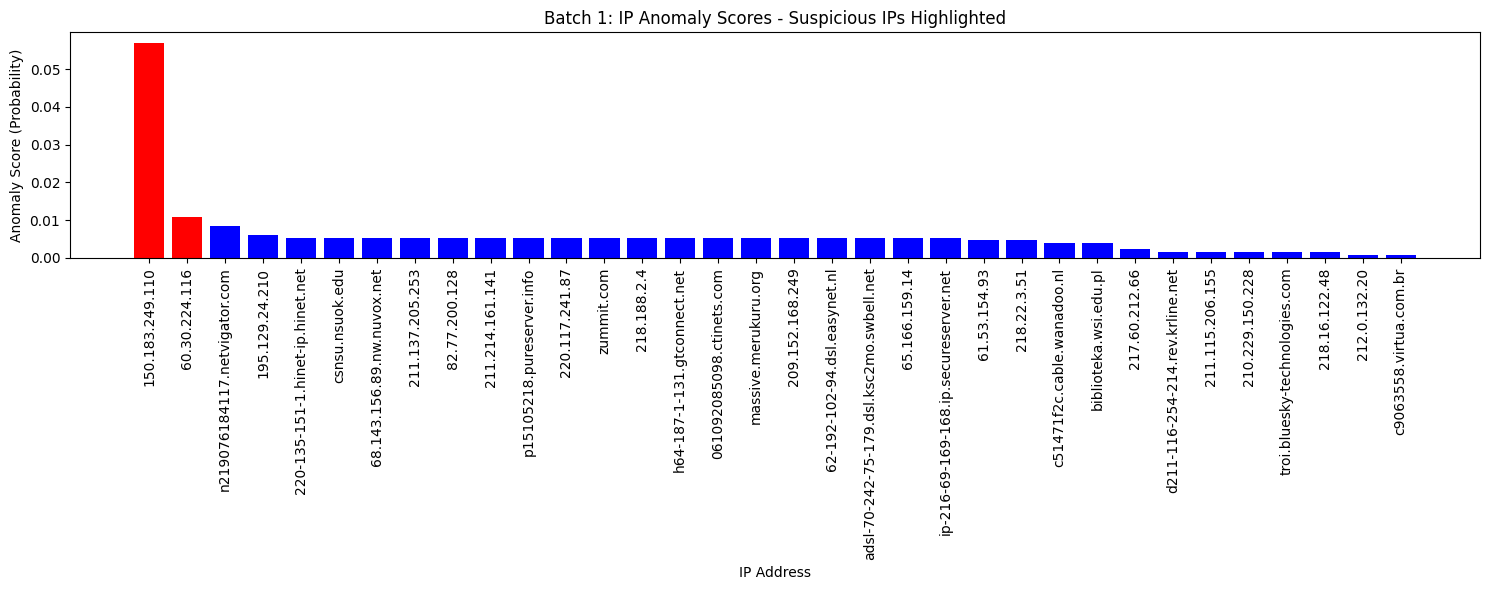

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0569  |  TTL: 1
  60.30.224.116  |  Score: 0.0108  |  TTL: 1

📦 Processing Batch 2


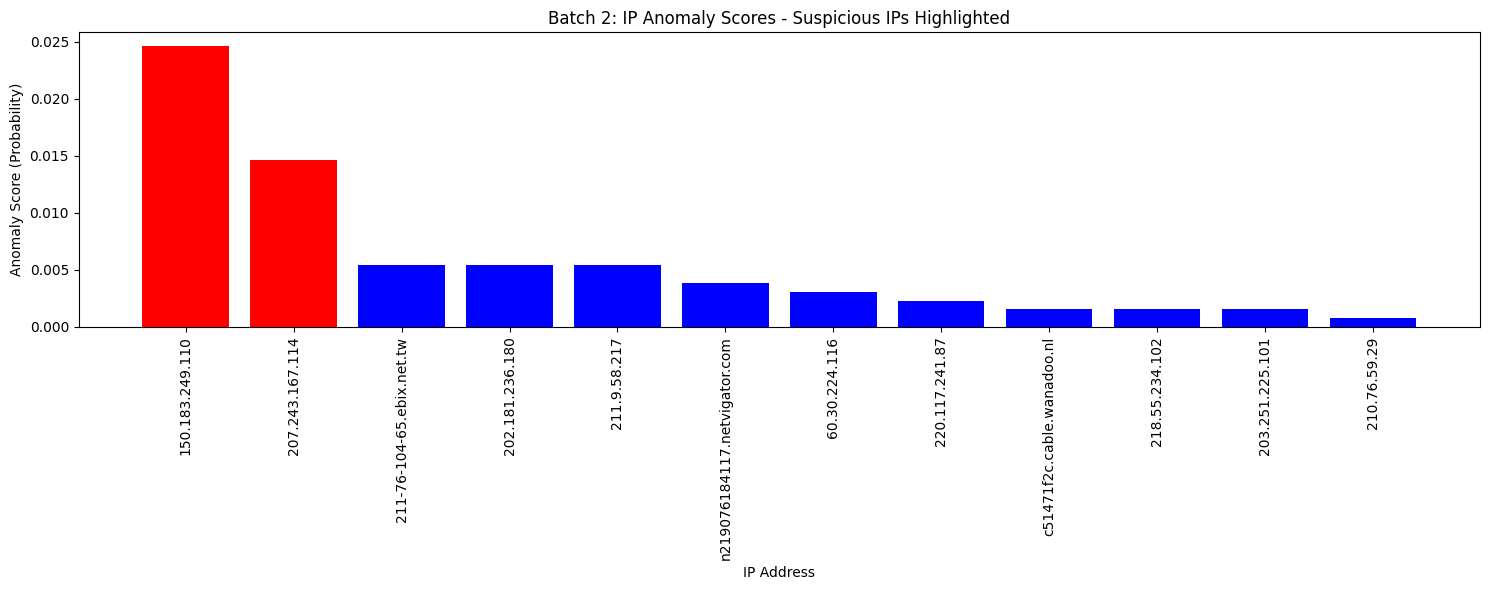

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0246  |  TTL: 1
  207.243.167.114  |  Score: 0.0146  |  TTL: 1

📦 Processing Batch 3


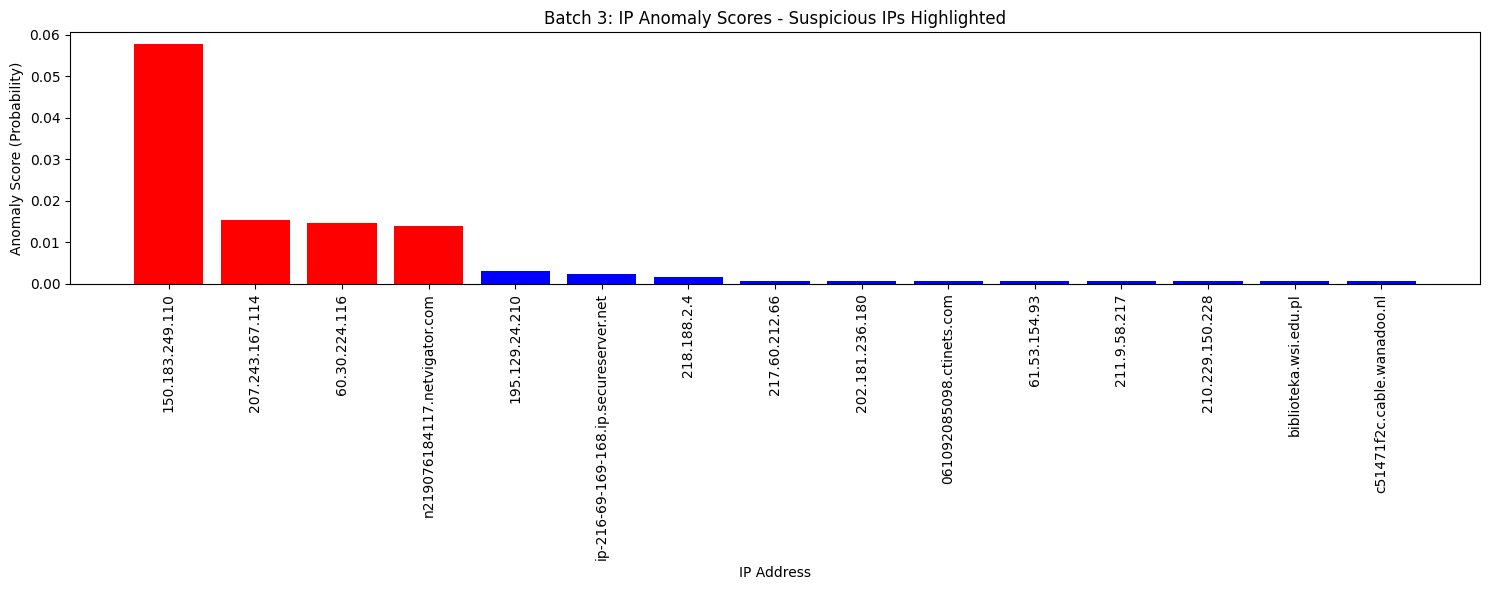

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0577  |  TTL: 1
  207.243.167.114  |  Score: 0.0154  |  TTL: 1
  60.30.224.116  |  Score: 0.0146  |  TTL: 1
  n219076184117.netvigator.com  |  Score: 0.0138  |  TTL: 1

📦 Processing Batch 4


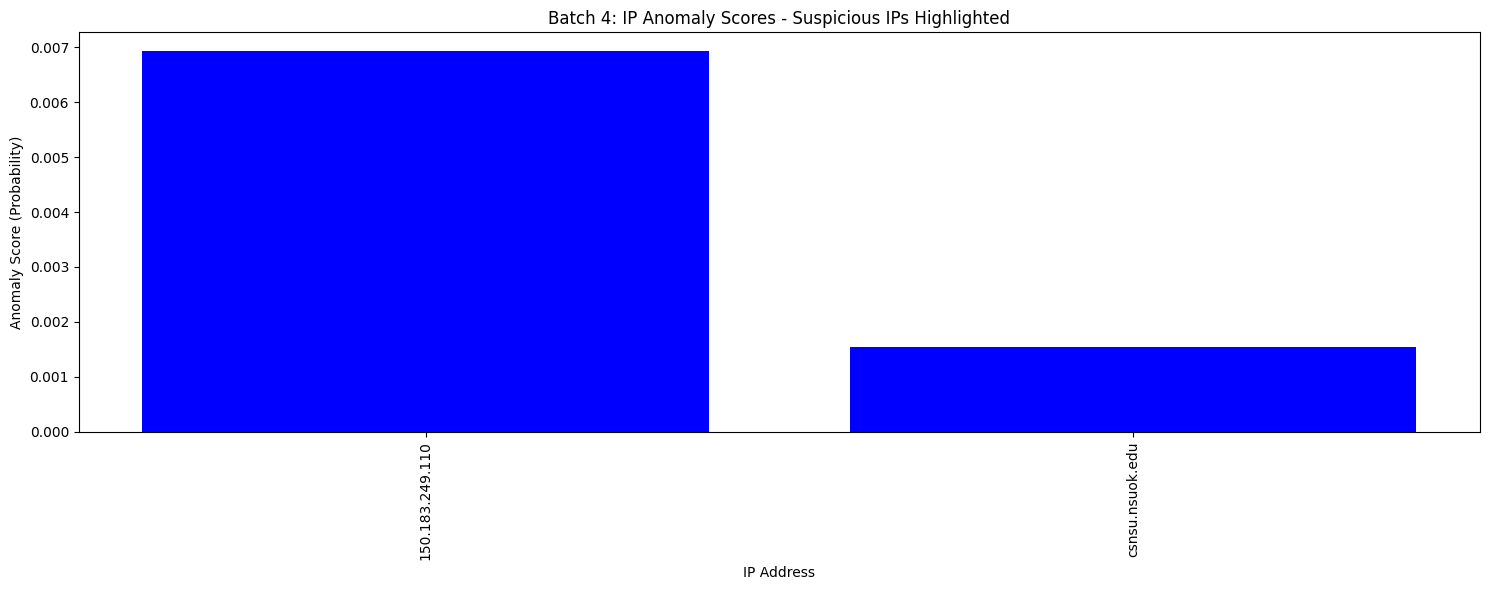

📌 Suspicious IP Queue with TTLs:

📦 Processing Batch 5


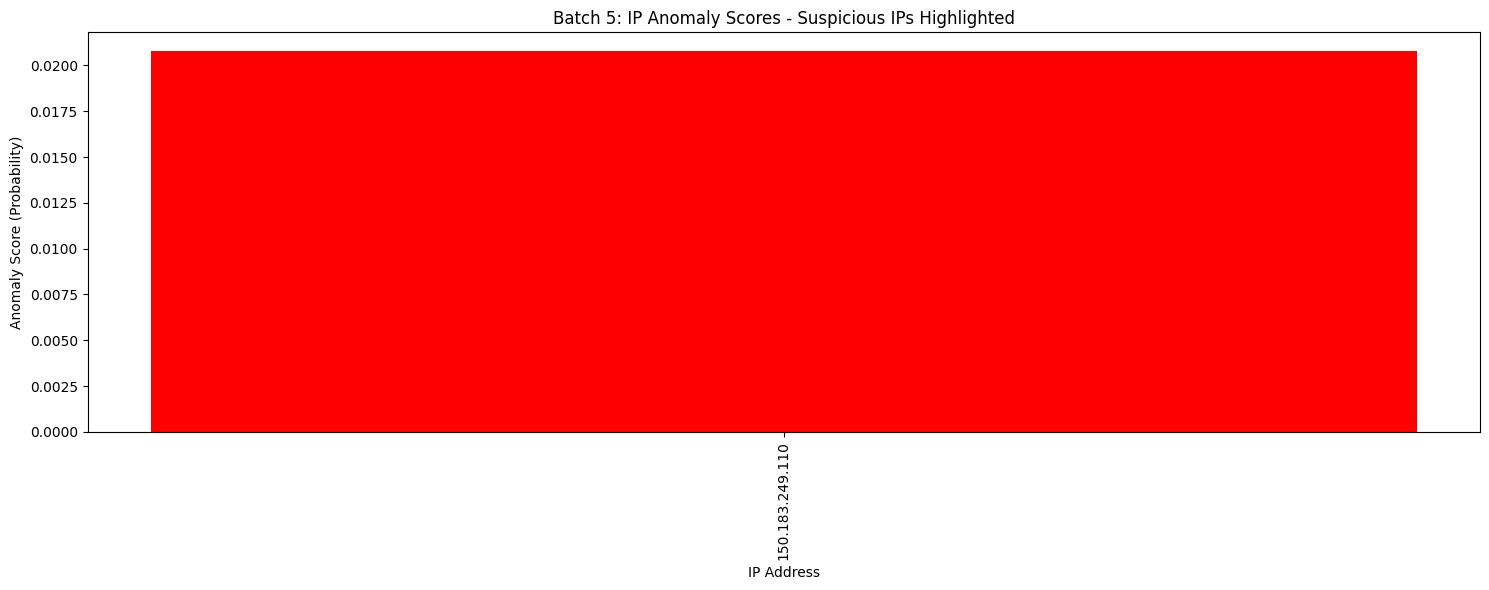

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0208  |  TTL: 1

📦 Processing Batch 6


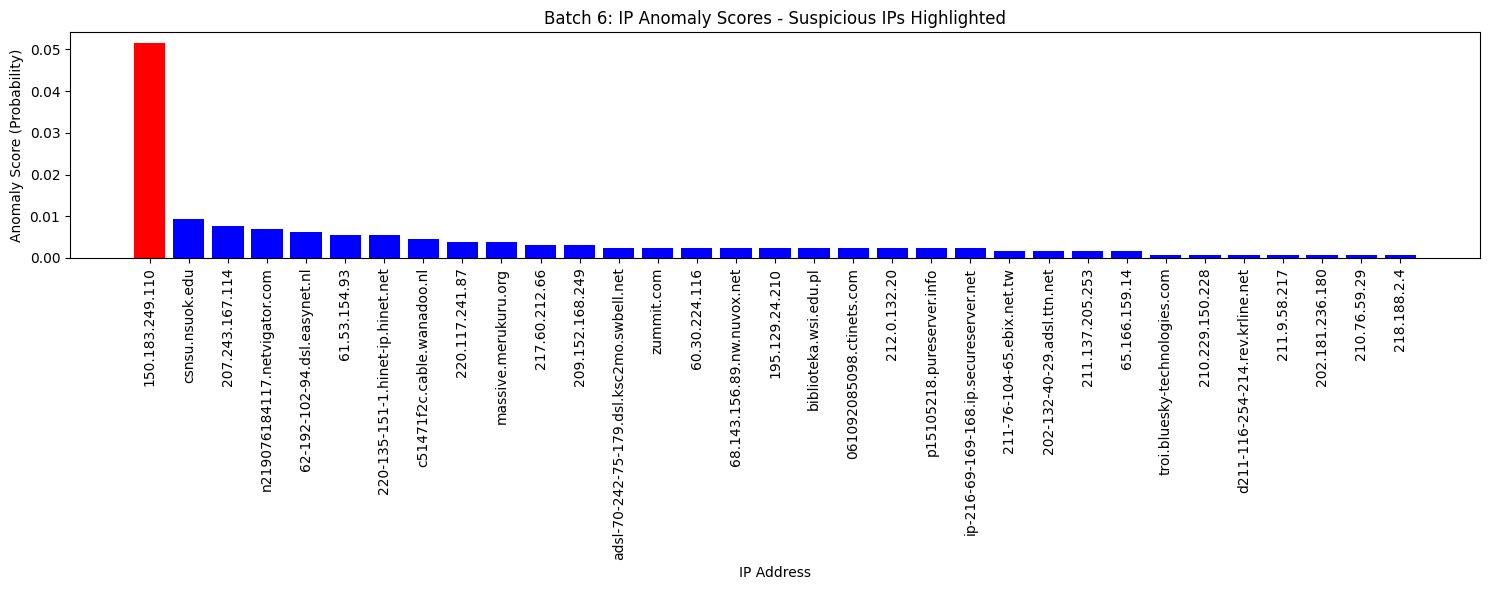

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0515  |  TTL: 1

📦 Processing Batch 7


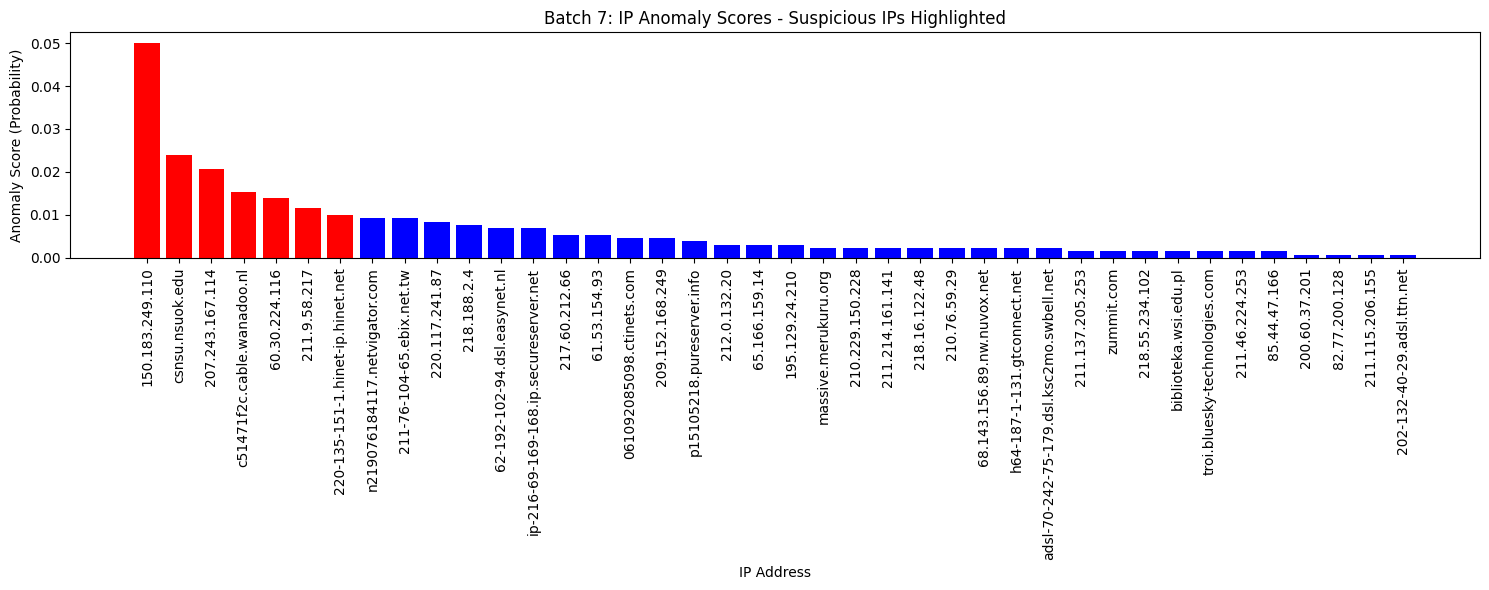

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0500  |  TTL: 1
  csnsu.nsuok.edu  |  Score: 0.0238  |  TTL: 1
  207.243.167.114  |  Score: 0.0208  |  TTL: 1
  c51471f2c.cable.wanadoo.nl  |  Score: 0.0154  |  TTL: 1
  60.30.224.116  |  Score: 0.0138  |  TTL: 1
  211.9.58.217  |  Score: 0.0115  |  TTL: 1
  220-135-151-1.hinet-ip.hinet.net  |  Score: 0.0100  |  TTL: 1

📦 Processing Batch 8


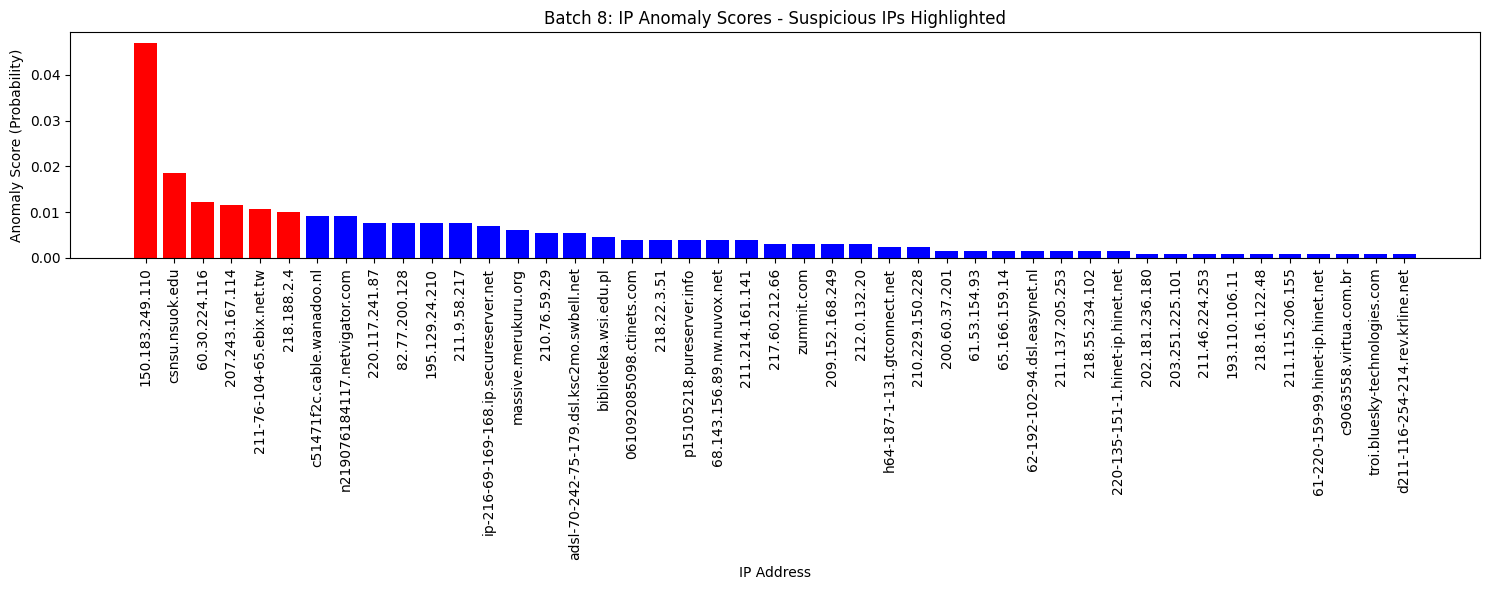

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0469  |  TTL: 1
  csnsu.nsuok.edu  |  Score: 0.0185  |  TTL: 1
  207.243.167.114  |  Score: 0.0115  |  TTL: 1
  60.30.224.116  |  Score: 0.0123  |  TTL: 1
  211-76-104-65.ebix.net.tw  |  Score: 0.0108  |  TTL: 1
  218.188.2.4  |  Score: 0.0100  |  TTL: 1

📦 Processing Batch 9


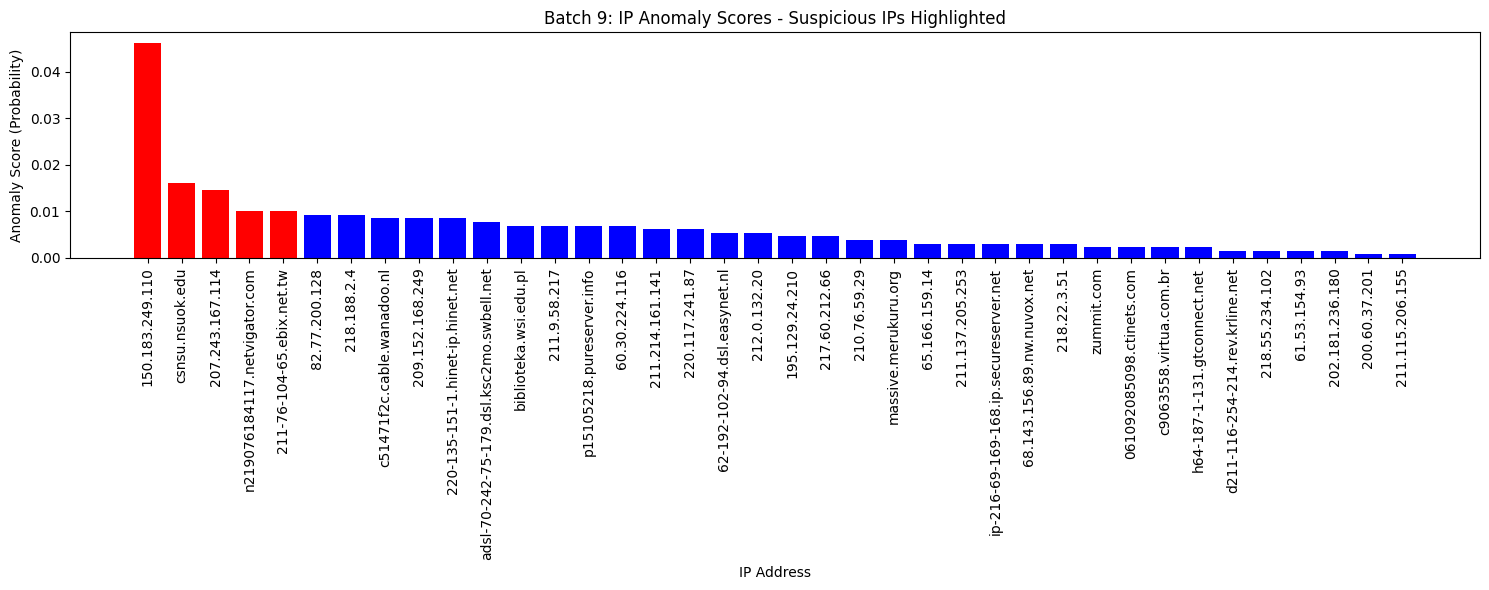

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0462  |  TTL: 1
  csnsu.nsuok.edu  |  Score: 0.0162  |  TTL: 1
  207.243.167.114  |  Score: 0.0146  |  TTL: 1
  211-76-104-65.ebix.net.tw  |  Score: 0.0100  |  TTL: 1
  n219076184117.netvigator.com  |  Score: 0.0100  |  TTL: 1

📦 Processing Batch 10


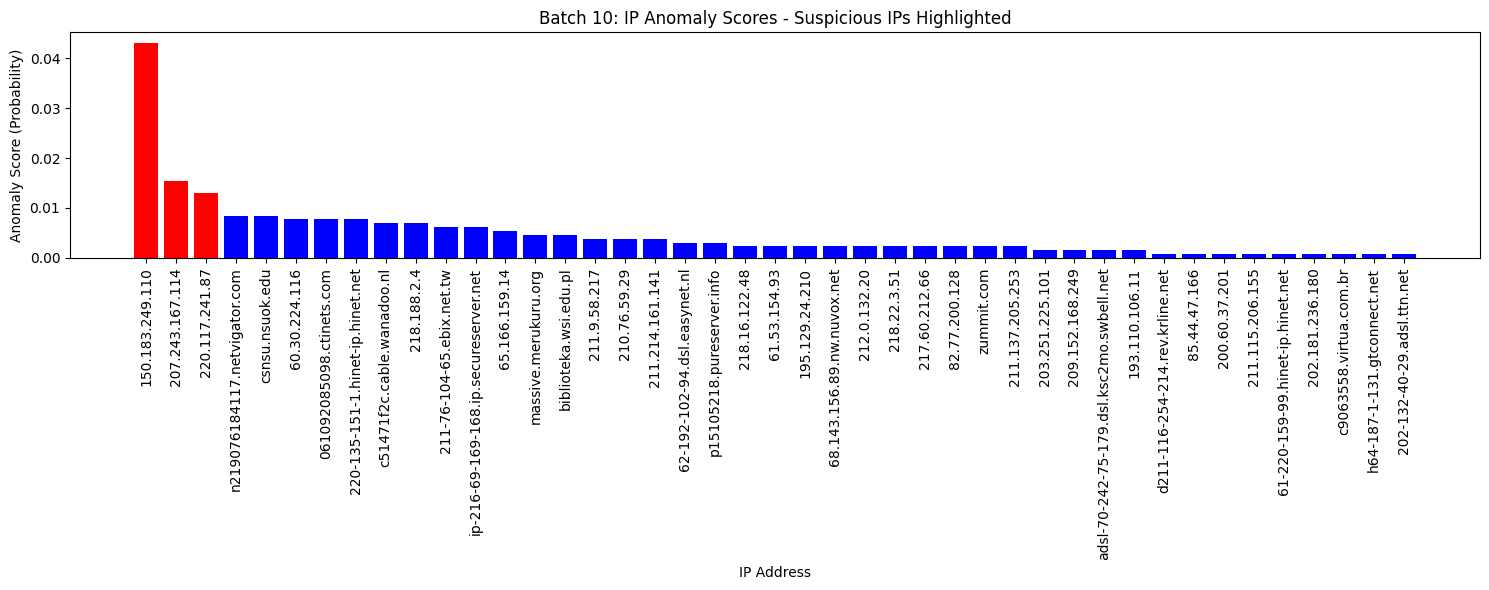

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0431  |  TTL: 1
  207.243.167.114  |  Score: 0.0154  |  TTL: 1
  220.117.241.87  |  Score: 0.0131  |  TTL: 1

📦 Processing Batch 11


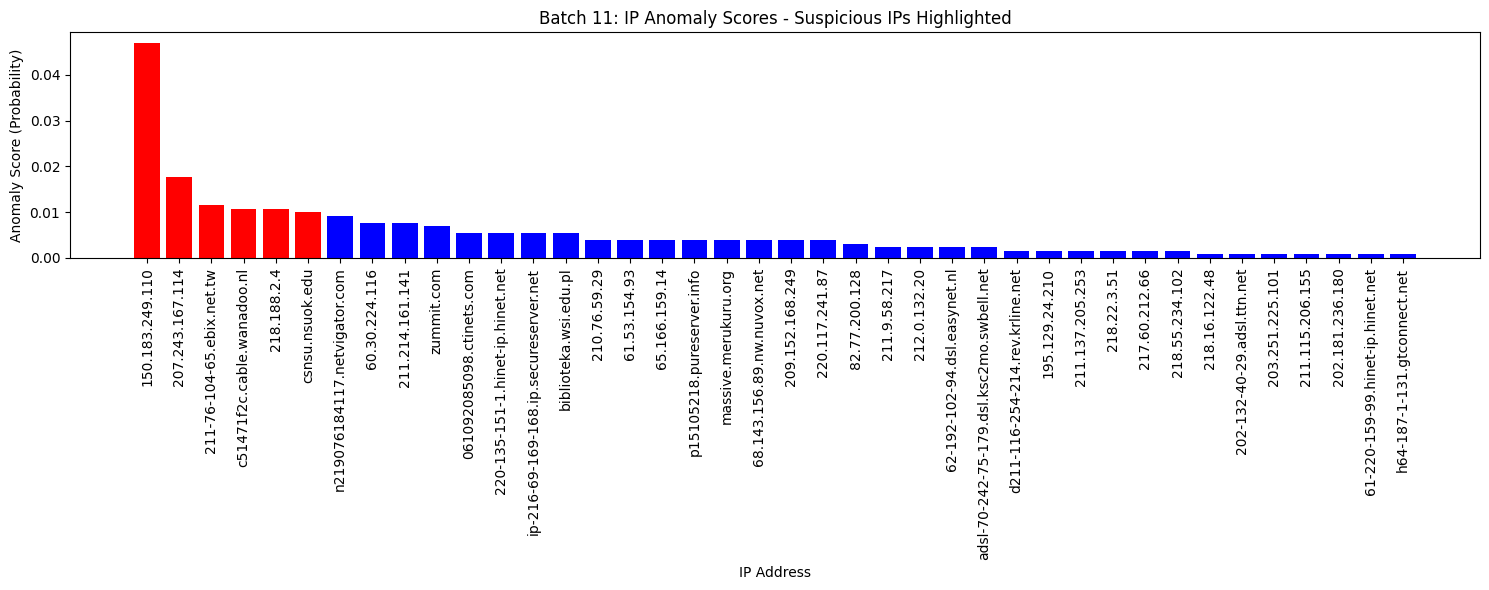

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0469  |  TTL: 1
  207.243.167.114  |  Score: 0.0177  |  TTL: 1
  211-76-104-65.ebix.net.tw  |  Score: 0.0115  |  TTL: 1
  c51471f2c.cable.wanadoo.nl  |  Score: 0.0108  |  TTL: 1
  218.188.2.4  |  Score: 0.0108  |  TTL: 1
  csnsu.nsuok.edu  |  Score: 0.0100  |  TTL: 1

📦 Processing Batch 12


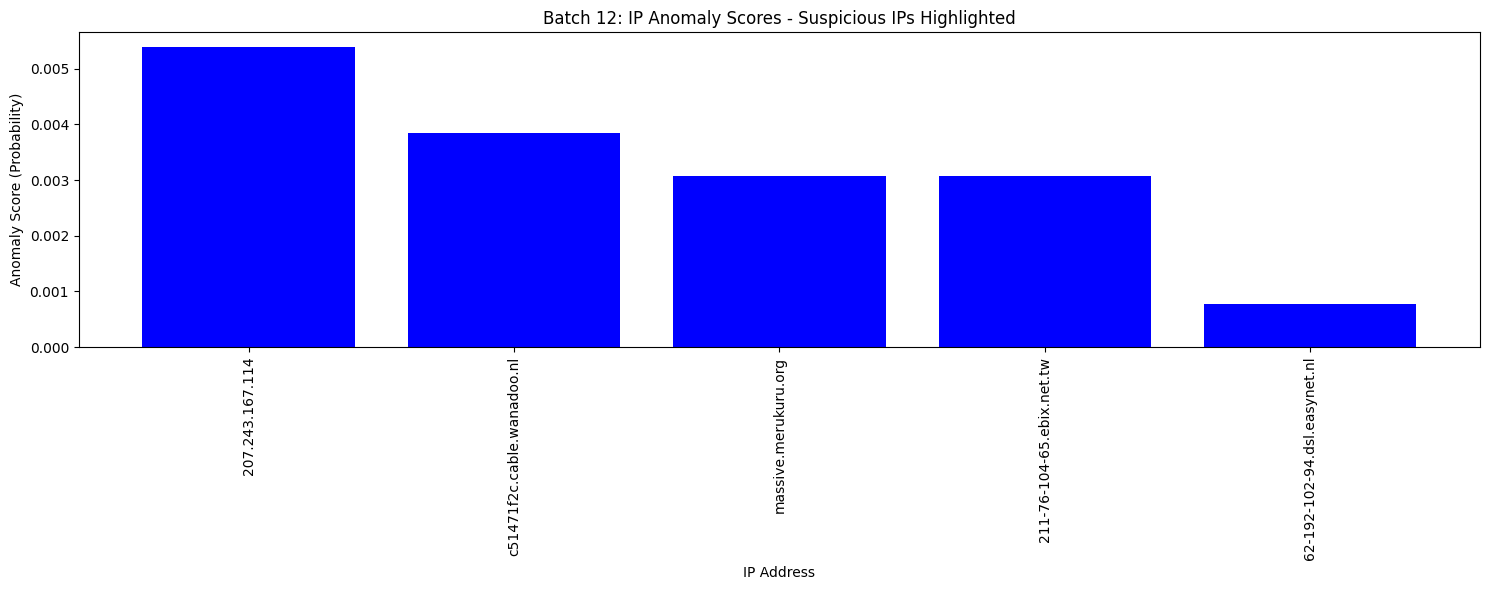

📌 Suspicious IP Queue with TTLs:

📦 Processing Batch 13


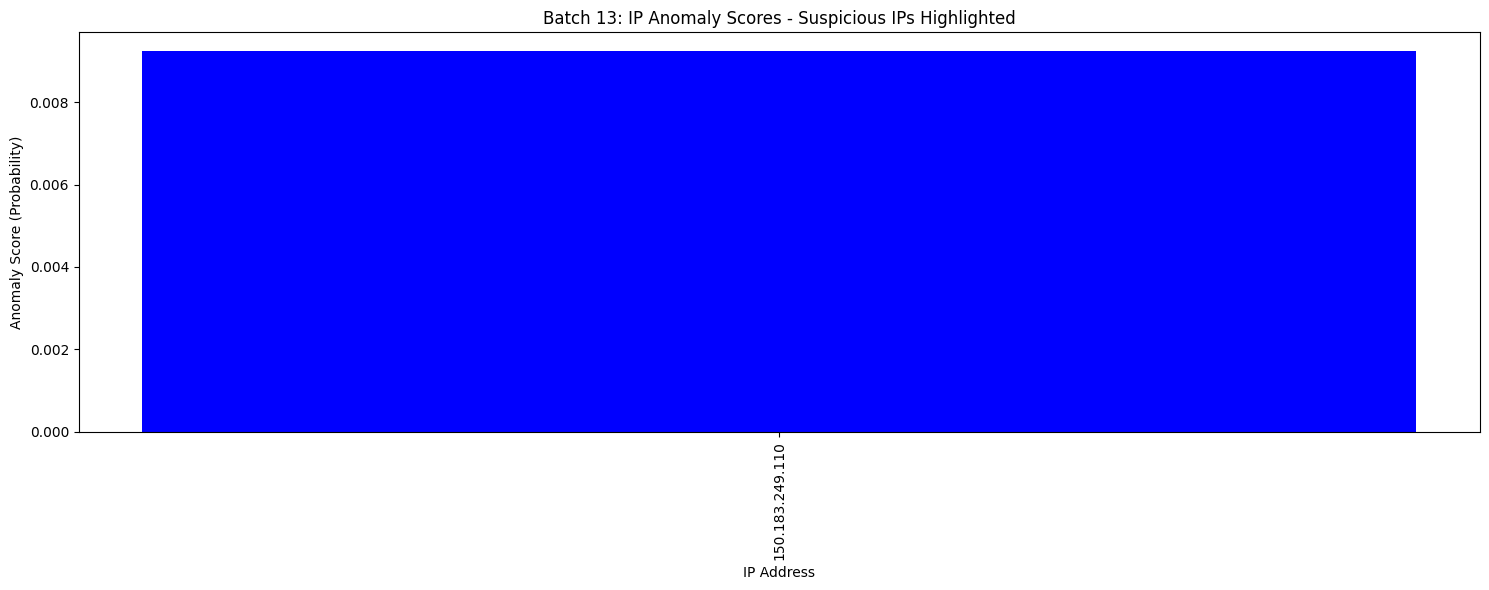

📌 Suspicious IP Queue with TTLs:

📦 Processing Batch 14


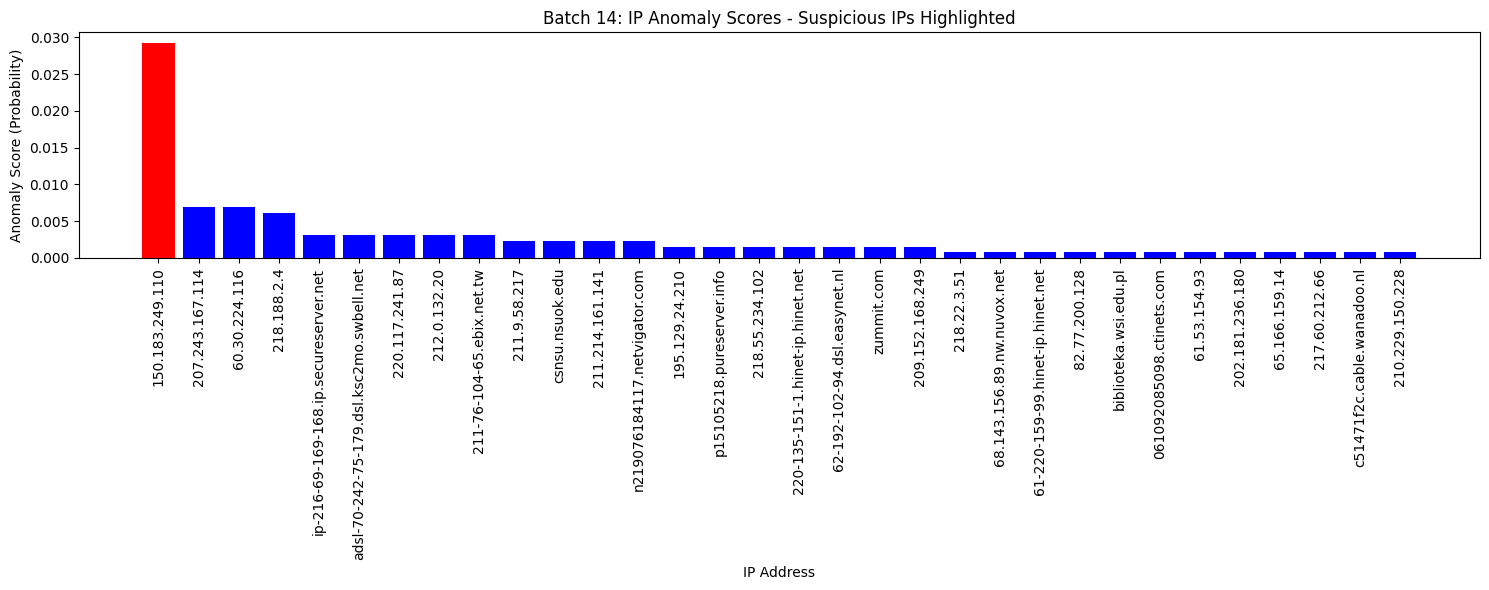

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0292  |  TTL: 1

📦 Processing Batch 15


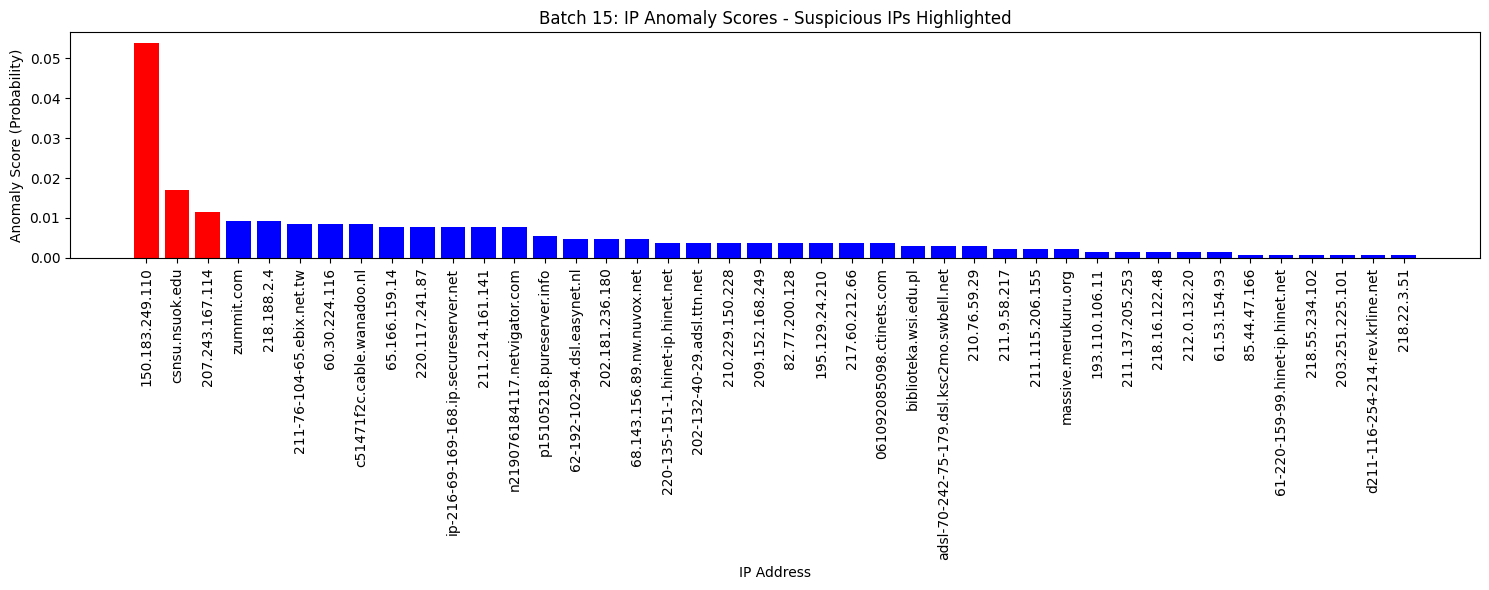

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0538  |  TTL: 1
  csnsu.nsuok.edu  |  Score: 0.0169  |  TTL: 1
  207.243.167.114  |  Score: 0.0115  |  TTL: 1

📦 Processing Batch 16


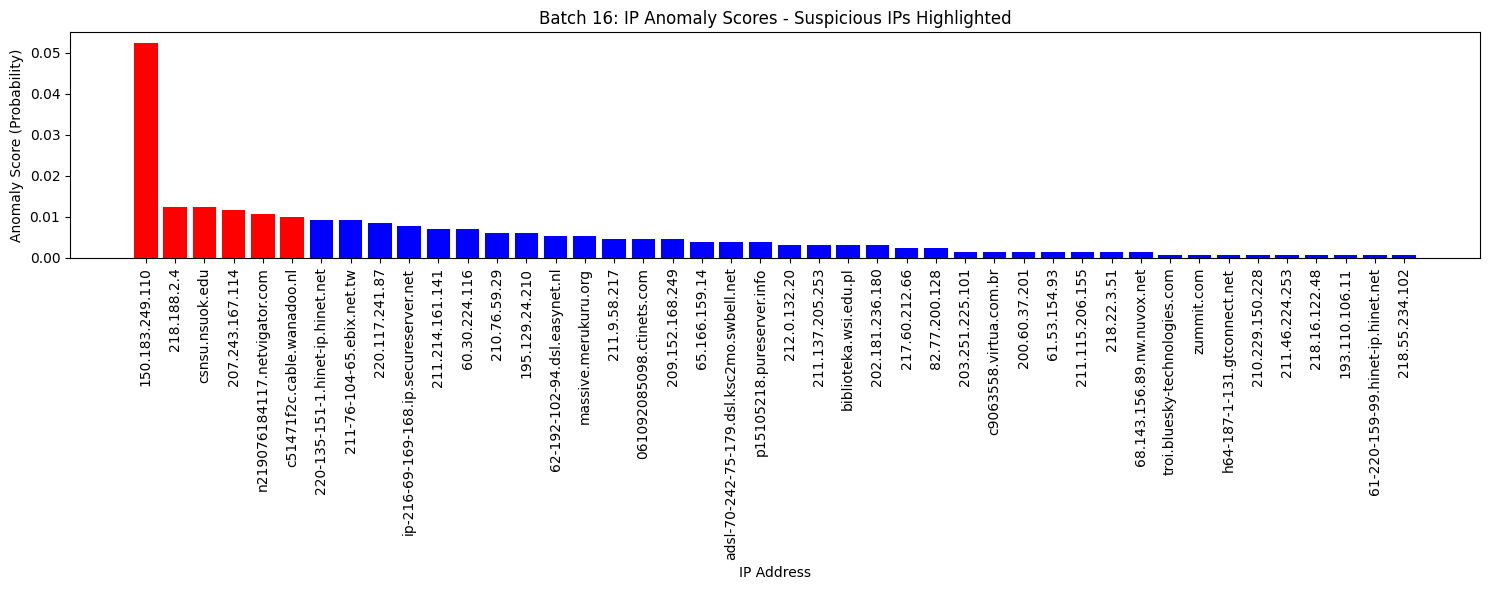

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0523  |  TTL: 1
  csnsu.nsuok.edu  |  Score: 0.0123  |  TTL: 1
  207.243.167.114  |  Score: 0.0115  |  TTL: 1
  218.188.2.4  |  Score: 0.0123  |  TTL: 1
  n219076184117.netvigator.com  |  Score: 0.0108  |  TTL: 1
  c51471f2c.cable.wanadoo.nl  |  Score: 0.0100  |  TTL: 1

📦 Processing Batch 17


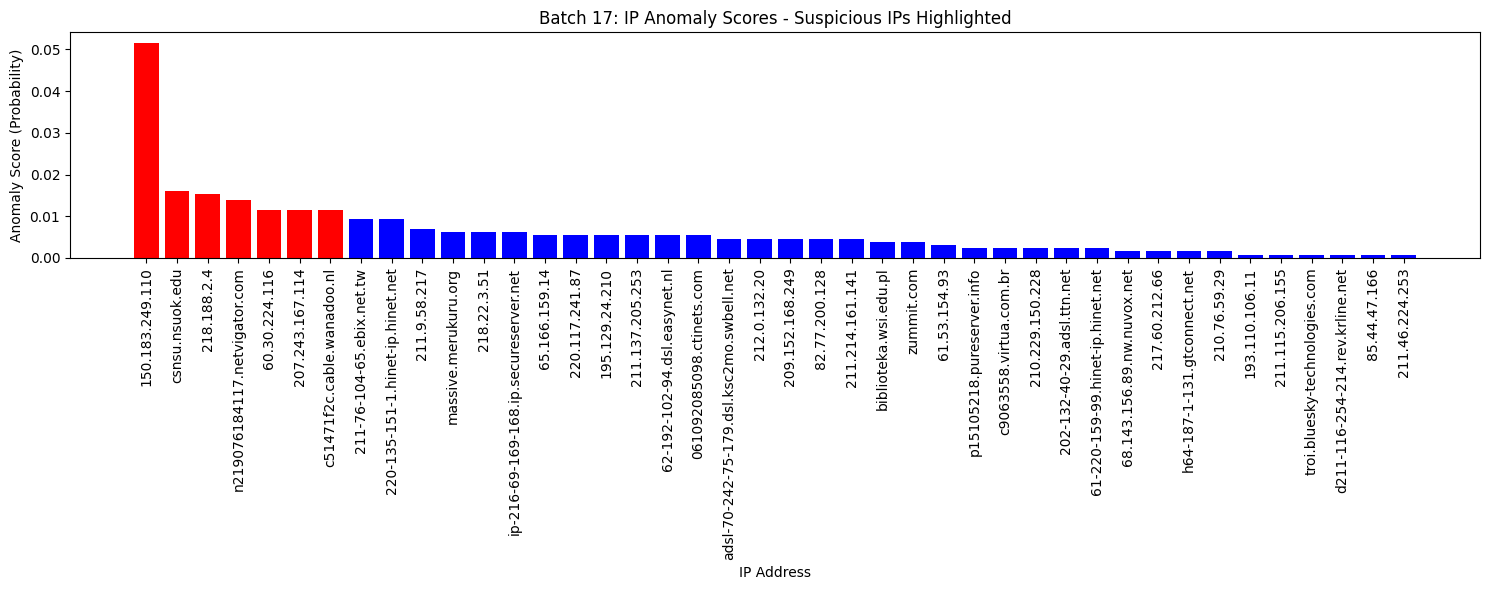

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0515  |  TTL: 1
  csnsu.nsuok.edu  |  Score: 0.0162  |  TTL: 1
  207.243.167.114  |  Score: 0.0115  |  TTL: 1
  218.188.2.4  |  Score: 0.0154  |  TTL: 1
  n219076184117.netvigator.com  |  Score: 0.0138  |  TTL: 1
  c51471f2c.cable.wanadoo.nl  |  Score: 0.0115  |  TTL: 1
  60.30.224.116  |  Score: 0.0115  |  TTL: 1

📦 Processing Batch 18


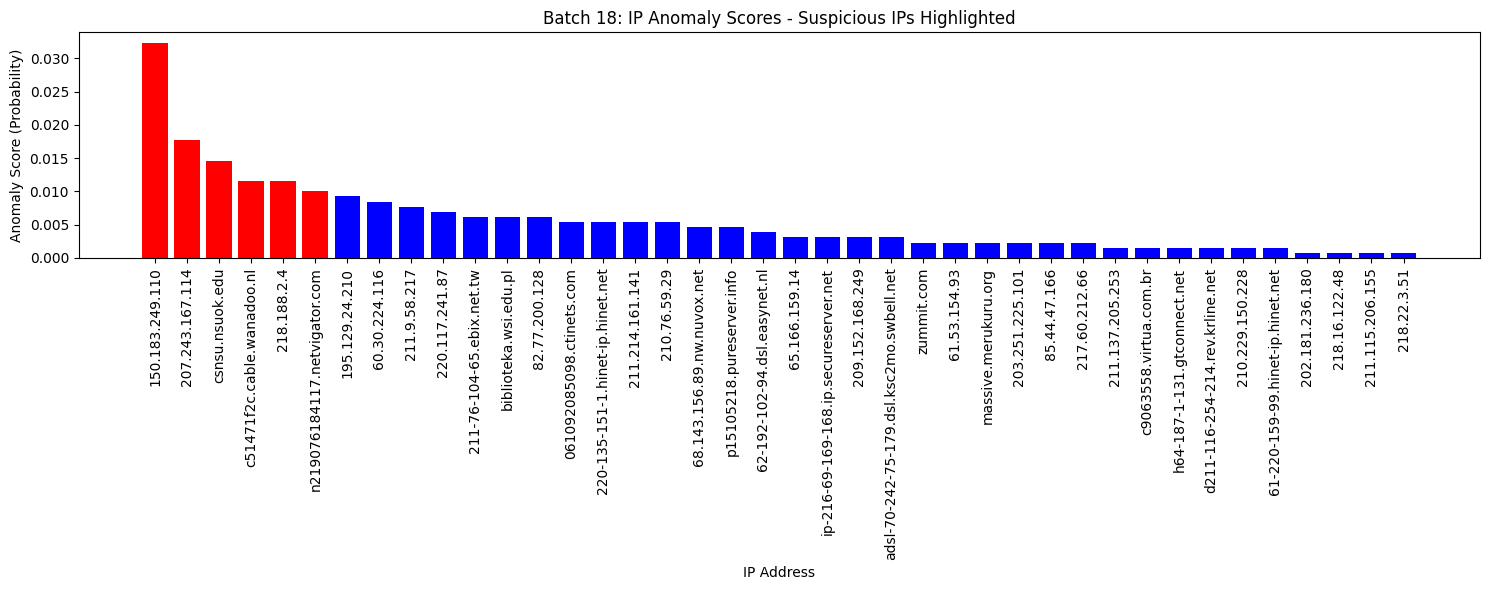

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0323  |  TTL: 1
  csnsu.nsuok.edu  |  Score: 0.0146  |  TTL: 1
  207.243.167.114  |  Score: 0.0177  |  TTL: 1
  218.188.2.4  |  Score: 0.0115  |  TTL: 1
  n219076184117.netvigator.com  |  Score: 0.0100  |  TTL: 1
  c51471f2c.cable.wanadoo.nl  |  Score: 0.0115  |  TTL: 1

📦 Processing Batch 19


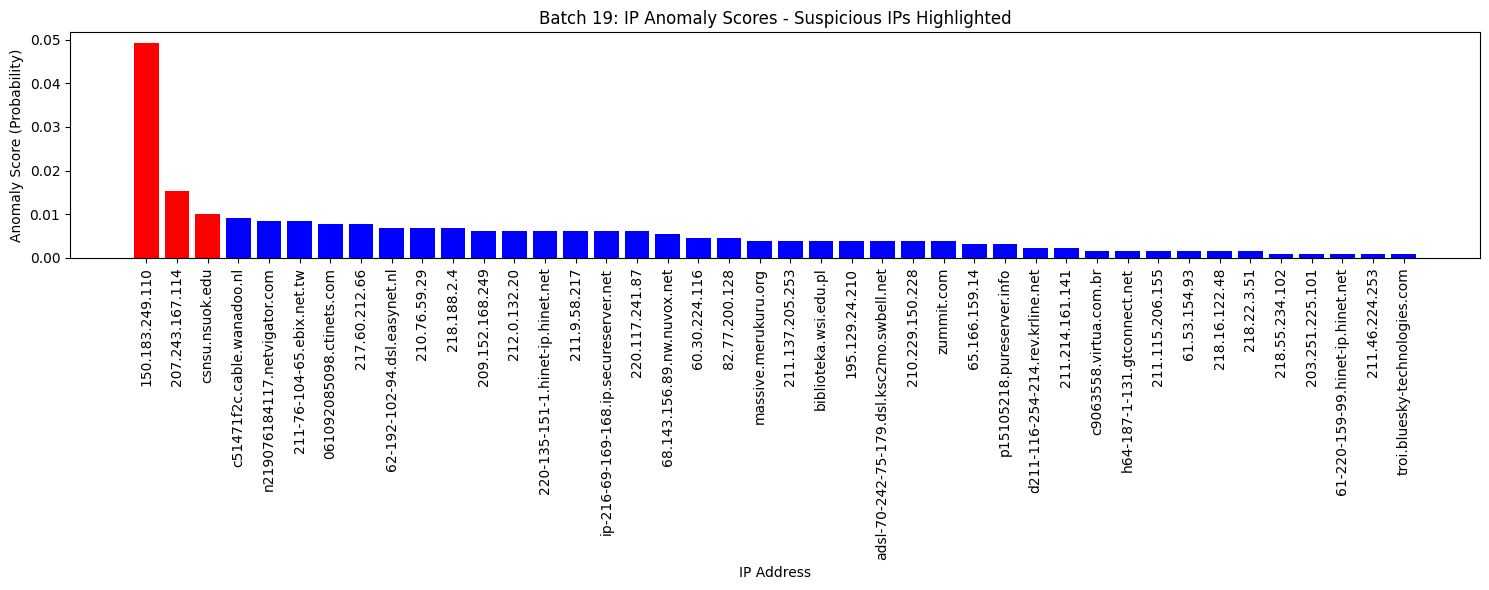

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0492  |  TTL: 1
  csnsu.nsuok.edu  |  Score: 0.0100  |  TTL: 1
  207.243.167.114  |  Score: 0.0154  |  TTL: 1

📦 Processing Batch 20


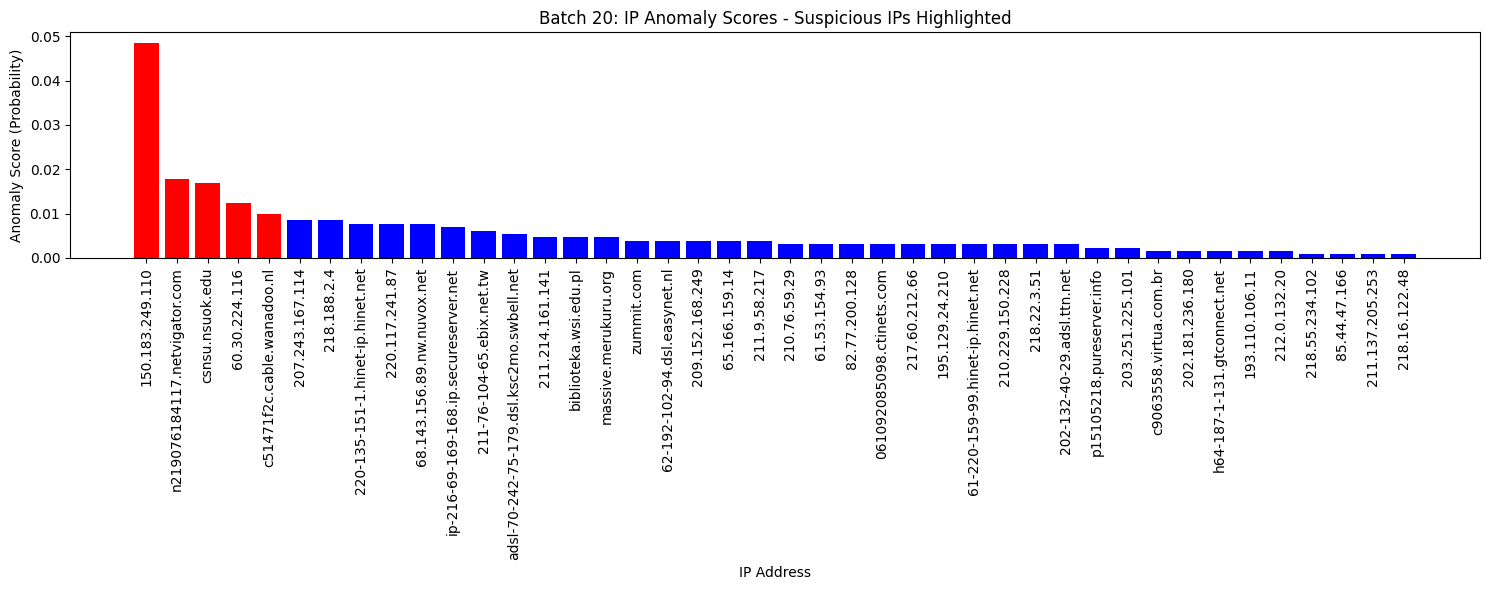

📌 Suspicious IP Queue with TTLs:
  150.183.249.110  |  Score: 0.0485  |  TTL: 1
  csnsu.nsuok.edu  |  Score: 0.0169  |  TTL: 1
  n219076184117.netvigator.com  |  Score: 0.0177  |  TTL: 1
  60.30.224.116  |  Score: 0.0123  |  TTL: 1
  c51471f2c.cable.wanadoo.nl  |  Score: 0.0100  |  TTL: 1

🕓 Persistent Memory Timeline Across Batches:

Batch 1:
  150.183.249.110 | Score: 0.0569 | TTL: 1
  60.30.224.116   | Score: 0.0108 | TTL: 1
  ➕ Added: 150.183.249.110, 60.30.224.116
--------------------------------------------------
Batch 2:
  150.183.249.110 | Score: 0.0246 | TTL: 1
  207.243.167.114 | Score: 0.0146 | TTL: 1
  ➕ Added: 207.243.167.114
  ❌ Removed: 60.30.224.116
--------------------------------------------------
Batch 3:
  150.183.249.110 | Score: 0.0577 | TTL: 1
  207.243.167.114 | Score: 0.0154 | TTL: 1
  60.30.224.116   | Score: 0.0146 | TTL: 1
  n219076184117.netvigator.com | Score: 0.0138 | TTL: 1
  ➕ Added: 60.30.224.116, n219076184117.netvigator.com
--------------------------

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- Scoring function ---
def get_ip_scores(df_batch):
    total_logs = len(df_batch)
    total_anomalous = df_batch[df_batch['Anomaly Detected'] == 'Yes']
    ip_anomaly_counts = total_anomalous['IP Address'].value_counts()
    
    ip_scores = {}
    for ip, count in ip_anomaly_counts.items():
        score = count / total_logs
        ip_scores[ip] = score

    return ip_scores

# --- Short-term memory class ---
class AnomalyMemorySimple:
    def __init__(self, threshold=0.01, ttl=2):
        self.memory = {}  # ip -> (score, ttl)
        self.threshold = threshold
        self.ttl = ttl

    def update(self, ip_scores):
        for ip, score in ip_scores.items():
            if score >= self.threshold:
                self.memory[ip] = (score, self.ttl)

    def decay(self):
        to_remove = []
        for ip in self.memory:
            score, ttl = self.memory[ip]
            if ttl <= 1:
                to_remove.append(ip)
            else:
                self.memory[ip] = (score, ttl - 1)
        for ip in to_remove:
            del self.memory[ip]

    def get_suspicious_ips(self):
        return list(self.memory.keys())
    
    def get_memory_state(self):
        return self.memory

# --- Plotting function ---
def plot_ip_scores(ip_scores, memory, batch_num):
    sorted_ips = sorted(ip_scores.items(), key=lambda x: x[1], reverse=True)
    ips, scores = zip(*sorted_ips) if sorted_ips else ([], [])
    suspicious = set(memory.get_suspicious_ips())
    colors = ['red' if ip in suspicious else 'blue' for ip in ips]

    plt.figure(figsize=(15, 6))
    plt.bar(ips, scores, color=colors)
    plt.xlabel("IP Address")
    plt.ylabel("Anomaly Score (Probability)")
    plt.title(f"Batch {batch_num}: IP Anomaly Scores - Suspicious IPs Highlighted")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# --- Initialize memory object ---
memory = AnomalyMemorySimple(threshold=0.01, ttl=2)

# --- Process all 20 batches ---
batch_dir = "batches"  # Folder containing batch_1.csv to batch_20.csv
num_batches = 20

memory_snapshots = []  # list of dicts: {ip: (score, ttl)}

for i in range(1, num_batches + 1):
    batch_path = os.path.join(batch_dir, f"batch_{i}.csv")
    df_batch = pd.read_csv(batch_path)

    print(f"\n📦 Processing Batch {i}")

    ip_scores = get_ip_scores(df_batch)
    memory.update(ip_scores)
    memory.decay()

    # Record current memory snapshot
    snapshot = memory.get_memory_state().copy()
    memory_snapshots.append((i, snapshot))

    # Plot
    plot_ip_scores(ip_scores, memory, i)

    # Show queue state
    print("📌 Suspicious IP Queue with TTLs:")
    for ip, (score, ttl) in snapshot.items():
        print(f"  {ip}  |  Score: {score:.4f}  |  TTL: {ttl}")

print("\n🕓 Persistent Memory Timeline Across Batches:\n")

# Track previous snapshot to detect removals
prev_ips = set()

for batch_num, snapshot in memory_snapshots:
    current_ips = set(snapshot.keys())
    added = current_ips - prev_ips
    removed = prev_ips - current_ips
    print(f"Batch {batch_num}:")
    
    for ip in snapshot:
        score, ttl = snapshot[ip]
        print(f"  {ip:<15} | Score: {score:.4f} | TTL: {ttl}")

    if added:
        print("  ➕ Added:", ", ".join(added))
    if removed:
        print("  ❌ Removed:", ", ".join(removed))
    print("-" * 50)

    prev_ips = current_ips


print("\n🧠 Final Suspicious IP Memory State:")
for ip, (score, ttl) in memory.get_memory_state().items():
    print(f"{ip}  |  Score: {score:.4f}  |  TTL: {ttl}")
